<a href="https://colab.research.google.com/github/osvaldo-terrazas/1_Extracci-n-de-Datos/blob/main/EVIDENCIA_1_Estadistica_Multivariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Integrantes y roles:**

**Osvaldo Terrazas Sánchez: Líder de Proyecto**

Responsable de coordinar el equipo, organizar reuniones y asegurarse de que todos los integrantes estén alineados con los objetivos del proyecto. También supervisará la documentación y la presentación final.

**Karen Doménica Vela Aguirre: Analista de Datos**

Encargada de la exploración inicial de los datos, análisis de la estructura de datos, identificación de valores nulos, y generación de estadísticas descriptivas. También se centrará en la limpieza de datos y justificación de las decisiones tomadas.

**Andre Álvarez Vizcaino: Desarrollador de Métricas y Visualizaciones**

Responsable de proponer y calcular métricas de eficiencia, así como de crear visualizaciones relevantes que apoyen el análisis exploratorio. Deberá documentar la metodología de cálculo y establecer umbrales de evaluación.

**Juan José Rodríguez Ochoa: Documentación y Presentación**

Encargado de la redacción de la documentación del proyecto, incluyendo comentarios claros en el código, explicaciones en Markdown.


## **Fecha de Entrega**
Semana 7

## **Introducción**

### ***Objetivo del Proyecto***

Nuestro objetivo es analizar la eficiencia de los operadores de CallMeMaybe. A través del estudio de datos sobre llamadas entrantes y salientes, buscaremos identificar a los operadores menos eficaces, centrándonos en métricas como llamadas perdidas y tiempos de espera. Este análisis proporcionará información clave para mejorar la calidad del servicio y optimizar el rendimiento de la empresa.

### ***Descripción del Problema***
CallMeMaybe enfrenta dificultades para identificar a los operadores ineficaces, lo que afecta la satisfacción del cliente. Un operador es considerado ineficaz si tiene muchas llamadas perdidas, largos tiempos de espera y baja actividad en llamadas salientes. Esto dificulta la toma de decisiones de los supervisores para mejorar la eficiencia del servicio.

### ***Descripción de los Datos Disponibles***
Para el análisis, contamos con dos conjuntos de datos clave.

El primero, telecom_dataset_us.csv, contiene información sobre las llamadas realizadas y recibidas en el call center, incluyendo columnas como user_id, date, direction, operator_id, is_missed_call, calls_count, call_duration y total_call_duration.

El segundo conjunto, telecom_clientes_us.csv, proporciona datos sobre los clientes, incluyendo user_id, tariff_plan y date_start. Estos datos nos permitirán evaluar la eficiencia de los operadores y comprender el comportamiento de los clientes en relación con las llamadas.



#**Plan de Trabajo**

### ***Metodología a utilizar***
Para llevar a cabo nuestro análisis, utilizaremos técnicas de clustering y regresión lineal.

El clustering nos permitirá agrupar a los operadores según características similares, como el número de llamadas atendidas, llamadas perdidas y duración de las llamadas. Esto facilitará la identificación de patrones y la segmentación de los operadores ineficaces.

Por otro lado, la regresión lineal se utilizará para analizar la relación entre variables clave, como el tiempo de espera y la cantidad de llamadas atendidas, lo que nos ayudará a predecir la eficiencia de los operadores y a establecer métricas de rendimiento.

Combinando estas dos metodologías, podremos obtener una visión más completa y fundamentada sobre la eficiencia operativa en CallMeMaybe.
### ***Distribución de tareas***


# **Librerías**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler



In [3]:
telecom_clients = pd.read_csv('telecom_clients_us.csv')
telecom_dataset = pd.read_csv('telecom_dataset_us.csv')
display(telecom_clients.head())
display(telecom_dataset.head())

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


En esta seccion sera necesario que verifiquemos utilizar el tipo de dato adecuado. "tariff plan" deberá ser categorico, "date start" debera ser fecha

***TELECOM CLIENTS***

In [4]:
telecom_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [5]:
telecom_clients.isnull().sum()

,0
user_id,0
tariff_plan,0
date_start,0


In [6]:
telecom_clients.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,732.0,167431.927596,633.810383,166373.0,166900.75,167432.0,167973.0,168606.0


**LIMPIEZA TELECOM CLIENTS**

In [7]:
# Convertir tariff_plan a tipo categórico
telecom_clients['tariff_plan'] = telecom_clients['tariff_plan'].astype('category')

# Convertir date_start a tipo de fecha
telecom_clients['date_start'] = pd.to_datetime(telecom_clients['date_start'])

In [8]:
telecom_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    category      
 2   date_start   732 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 12.4 KB


telecom_clients NO TIENE VALORES NULOS

***TELECOM DATASET***

In [10]:
telecom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [11]:
telecom_dataset.isnull().sum()

,0
user_id,0
date,0
direction,0
internal,117
operator_id,8172
is_missed_call,0
calls_count,0
call_duration,0
total_call_duration,0


In [12]:
telecom_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,53902.0,167295.344477,598.883775,166377.0,166782.0,167162.0,167819.0,168606.0
operator_id,45730.0,916535.993002,21254.123136,879896.0,900788.0,913938.0,937708.0,973286.0
calls_count,53902.0,16.451245,62.917170,1.0,1.0,4.0,12.0,4817.0
call_duration,53902.0,866.684427,3731.791202,0.0,0.0,38.0,572.0,144395.0
total_call_duration,53902.0,1157.133297,4403.468763,0.0,47.0,210.0,902.0,166155.0


**LIMPIEZA TELECOM DATASET**

In [13]:
#Convertir date a tipo de fecha
telecom_dataset['date'] = pd.to_datetime(telecom_dataset['date'])

In [14]:
telecom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53902 non-null  int64                    
 1   date                 53902 non-null  datetime64[ns, UTC+03:00]
 2   direction            53902 non-null  object                   
 3   internal             53785 non-null  object                   
 4   operator_id          45730 non-null  float64                  
 5   is_missed_call       53902 non-null  bool                     
 6   calls_count          53902 non-null  int64                    
 7   call_duration        53902 non-null  int64                    
 8   total_call_duration  53902 non-null  int64                    
dtypes: bool(1), datetime64[ns, UTC+03:00](1), float64(1), int64(4), object(2)
memory usage: 3.3+ MB


VALORES NULOS TELECOM DATASET

In [15]:
telecom_dataset['operator_id'] = telecom_dataset['operator_id'].fillna('Not_Registered')
telecom_dataset['internal'] = telecom_dataset['internal'].fillna('Not_Registered')

In [16]:
telecom_dataset.isna().sum()

,0
user_id,0
date,0
direction,0
internal,0
operator_id,0
is_missed_call,0
calls_count,0
call_duration,0
total_call_duration,0


CREACIÓN DE COLUMNA IVR TIME

In [17]:
telecom_dataset['IVR Time'] = telecom_dataset['total_call_duration'] - telecom_dataset['call_duration']

In [18]:
telecom_dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,IVR Time
0,166377,2019-08-04 00:00:00+03:00,in,False,Not_Registered,True,2,0,4,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,8
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,25


ELIMINAR OUTLIERS

<Figure size 2000x1000 with 0 Axes>

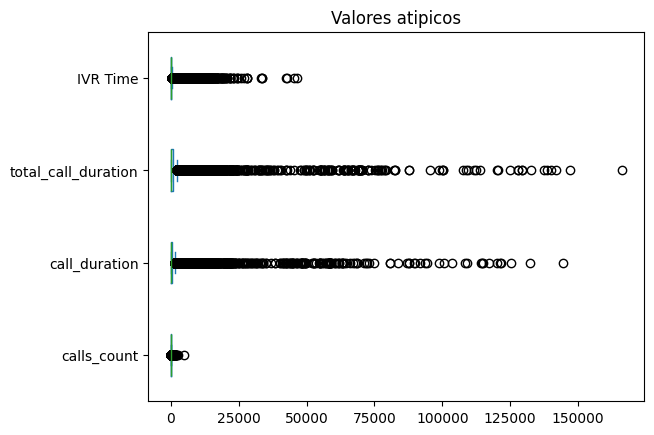

In [19]:
columnas_cuantitativas = telecom_dataset[['calls_count', 'call_duration', 'total_call_duration', 'IVR Time']].copy()
columnas_cualitativas = telecom_dataset[['user_id', 'date', 'direction', 'internal', 'operator_id', 'is_missed_call']].copy()
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [20]:
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido calls_count              205.202754
call_duration          12062.058032
total_call_duration    14367.539586
IVR Time                3674.165831
dtype: float64
Limite inferior permitido calls_count             -172.300265
call_duration         -10328.689177
total_call_duration   -12053.272991
IVR Time               -3093.268091
dtype: float64


In [21]:
#Filtrar solo por columnas dentro de los limites
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]
#Revisar valores nulos
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

,0
calls_count,454
call_duration,403
total_call_duration,424
IVR Time,455


In [22]:
#Hacer una copia del dataframe y rellenar los valores nulos con la media
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))

#Se juntan las columnas cualitativas con las cuantitativas
telecom_dataset_outliers = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
telecom_dataset_outliers.head()

,calls_count,call_duration,total_call_duration,IVR Time,user_id,date,direction,internal,operator_id,is_missed_call
0,2.0,0.0,4.0,4.0,166377,2019-08-04 00:00:00+03:00,in,False,Not_Registered,True
1,3.0,0.0,5.0,5.0,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True
2,1.0,0.0,1.0,1.0,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True
3,1.0,10.0,18.0,8.0,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False
4,3.0,0.0,25.0,25.0,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True


In [23]:
#Corroboramos que no existan valores nulos
telecom_dataset_outliers_nulos = telecom_dataset.isnull().sum()
telecom_dataset_outliers_nulos

,0
user_id,0
date,0
direction,0
internal,0
operator_id,0
is_missed_call,0
calls_count,0
call_duration,0
total_call_duration,0
IVR Time,0


## **ANALISIS EXPLORATORIO DE DATOS**

Contamos con dos set de datos:

telecom_dataset_us.csv contiene la información de las llamadas realizadas desde/al callcenter y de los operadores que tomaron/realizaron las llamadas.

telecom_clientes_us.csv contiene la información de los clientes.

El dataset comprimido telecom_dataset_us.csv contiene las siguientes columnas:

user_id: ID de la cuenta de cliente que debe ser unico

date: fecha en la que se recuperaron las estadísticas.Esta corresponde a un formato dd/MM/YYYY HH:mm para su analisis

direction: "dirección" de llamada (out para saliente, in para entrante)

internal: si la llamada fue interna (entre los operadores de un cliente o clienta)

operator_id: identificador del operador

is_missed_call: si fue una llamada perdida

calls_count: número de llamadas

call_duration: duración de la llamada (sin incluir el tiempo de espera)

total_call_duration: duración de la llamada (incluido el tiempo de espera)

El conjunto de datos telecom_clients_us.csv tiene las siguientes columnas:

user_id: ID de usuario/a

tariff_plan: tarifa actual de la clientela

date_start: fecha de registro de la clientela

**VARIABLES NUMERICAS**

HISTOGRAMA DE CALLS COUNT

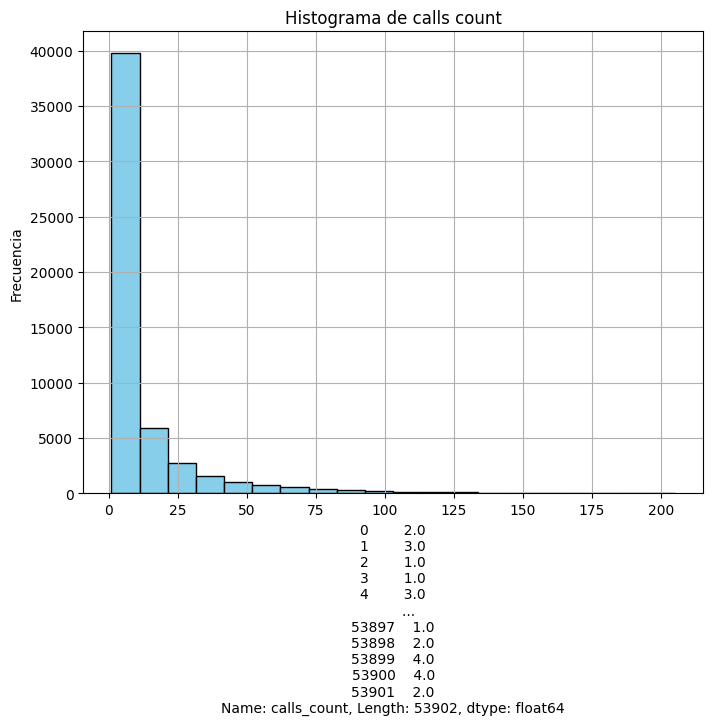

In [25]:
plt.figure(figsize=(8, 6))
plt.hist(telecom_dataset_outliers['calls_count'], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histograma de calls count')
plt.xlabel(telecom_dataset_outliers['calls_count'])
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

HISTOGRAMA DE CALL DURATION

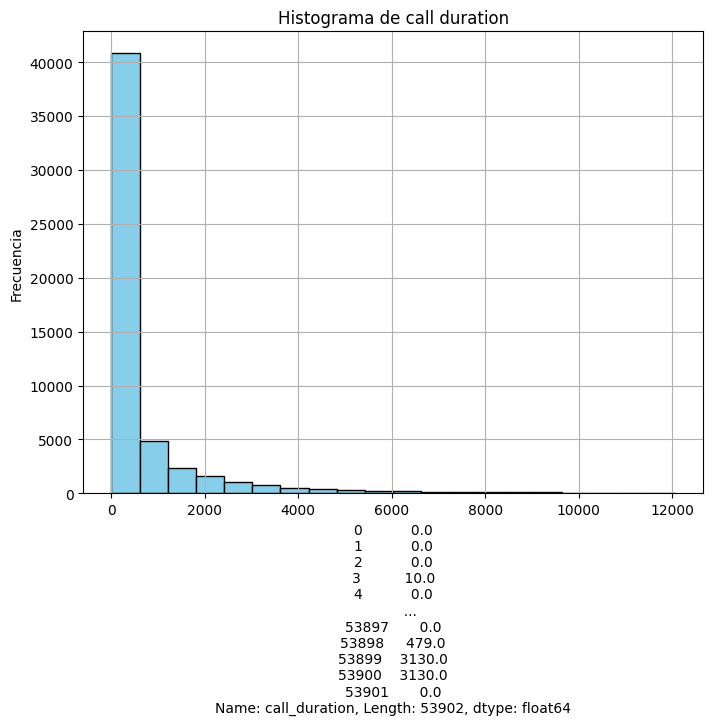

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(telecom_dataset_outliers['call_duration'], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histograma de call duration')
plt.xlabel(telecom_dataset_outliers['call_duration'])
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

HISTOGRAMA DE TOTAL CALL DURATION

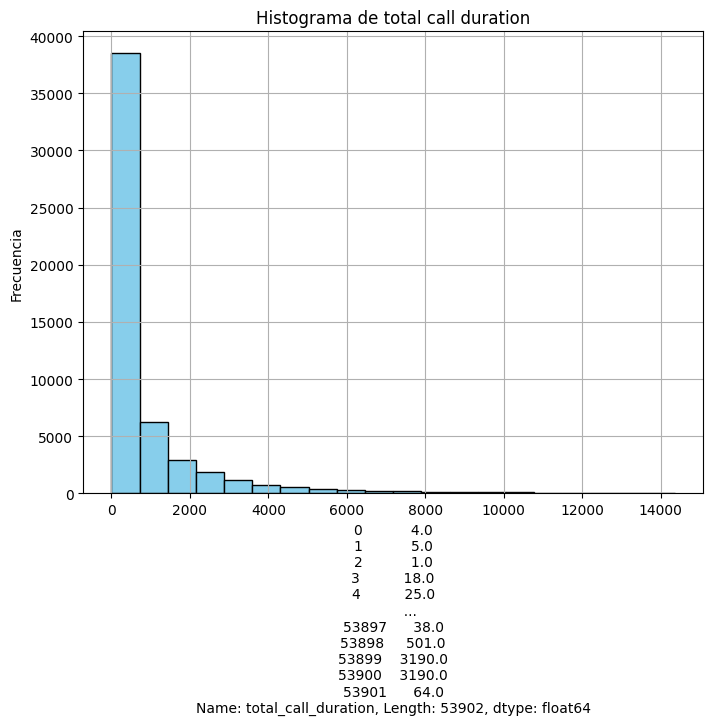

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(telecom_dataset_outliers['total_call_duration'], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histograma de total call duration')
plt.xlabel(telecom_dataset_outliers['total_call_duration'])
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

HISTOGRAMA DE IVR TIME

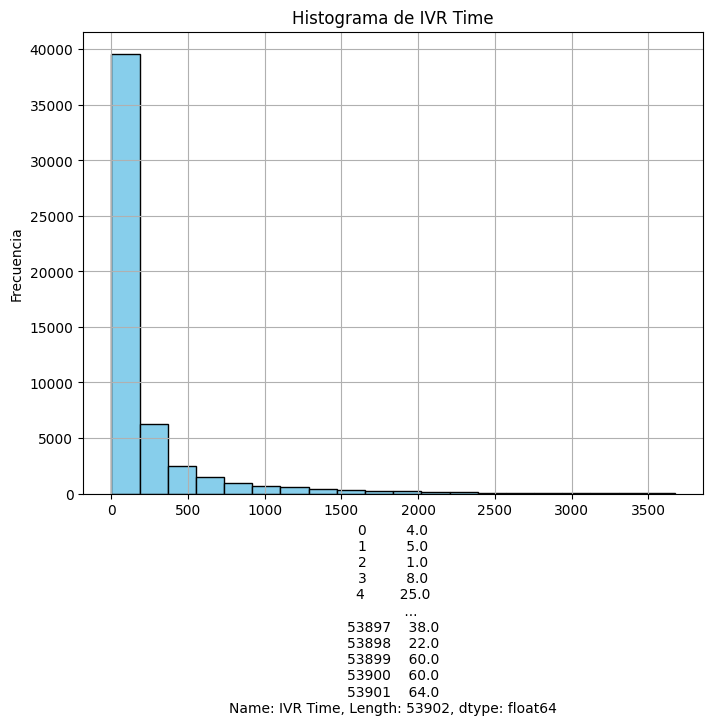

In [29]:
plt.figure(figsize=(8, 6))
plt.hist(telecom_dataset_outliers['IVR Time'], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histograma de IVR Time')
plt.xlabel(telecom_dataset_outliers['IVR Time'])
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

**VARIABLES CATEGORICAS**

GRAFICO DE PASTEL PARA DIRECTION

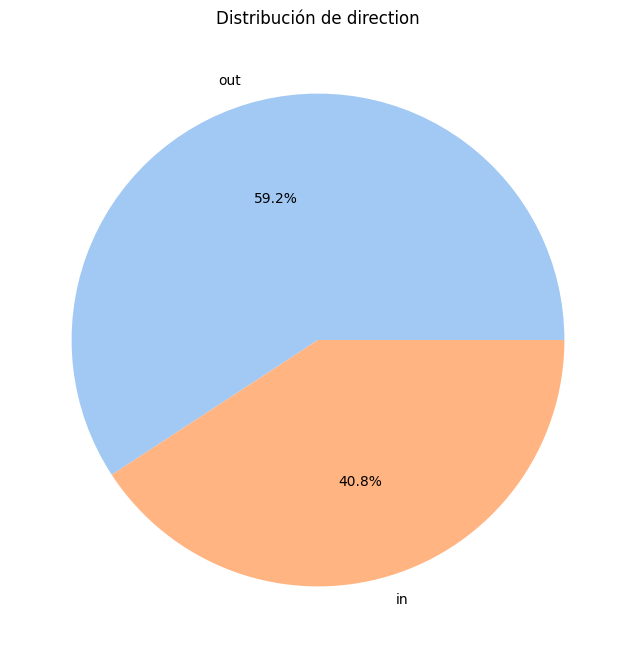

In [30]:
frecuencia_direction = telecom_dataset_outliers['direction'].value_counts()
plt.figure(figsize=(8, 8))
frecuencia_direction.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel", len(frecuencia_direction)))
plt.title(f'Distribución de direction')
plt.ylabel('')
plt.show()

GRAFICO DE PASTEL PARA INTERNAL

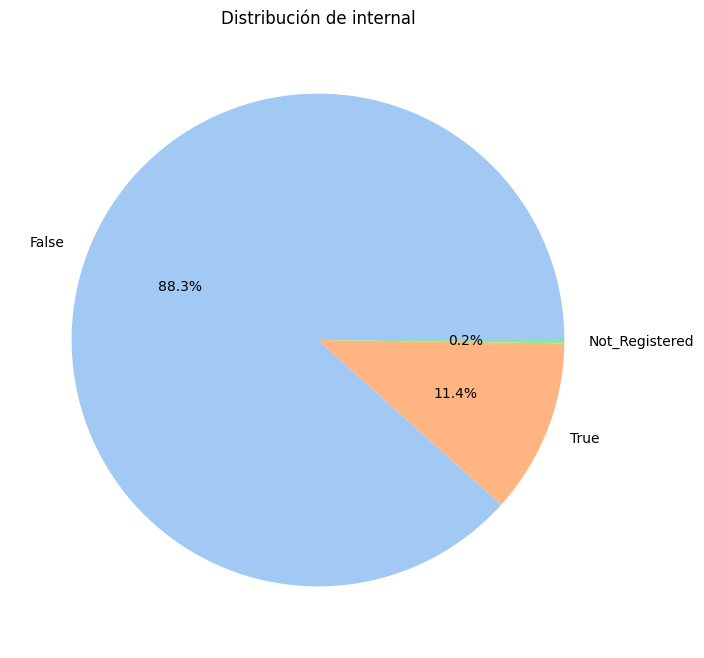

In [31]:
frecuencia_internal = telecom_dataset_outliers['internal'].value_counts()
plt.figure(figsize=(8, 8))
frecuencia_internal.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel", len(frecuencia_internal)))
plt.title(f'Distribución de internal')
plt.ylabel('')
plt.show()

GRAFICO DE PASTEL PARA IS MISSED CALL

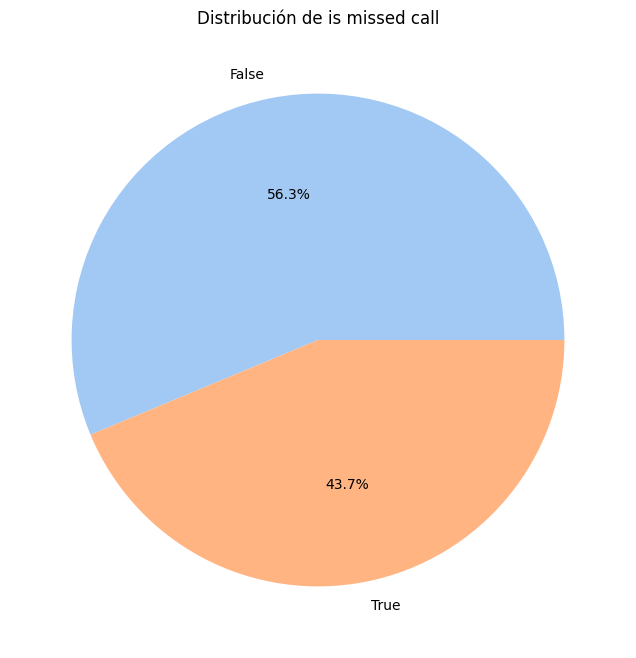

In [32]:
frecuencia_ismissedcall = telecom_dataset_outliers['is_missed_call'].value_counts()
plt.figure(figsize=(8, 8))
frecuencia_ismissedcall.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel", len(frecuencia_ismissedcall)))
plt.title(f'Distribución de is missed call')
plt.ylabel('')
plt.show()

## **IDENTIFICACION DE OPERADORES INEFICACES**

In [33]:
operadores_ineficaces = []

**LLAMADAS ENTRANTES**

In [39]:
#Operadores con gran cantidad de llamadas entrantes
llamadas_entrantes = telecom_dataset_outliers[telecom_dataset_outliers['direction'] == 'in']
umbral_entrantes = llamadas_entrantes['calls_count'].quantile(0.75)
operadores_ineficaces_llamadas_entrantes = llamadas_entrantes[llamadas_entrantes['calls_count'] > umbral_entrantes]['operator_id'].unique().tolist()

#Colocar a los operadores ineficaces en llamadas entrantes a la lista de operadores ineficaces
operadores_ineficaces_llamadas_entrantes.extend(operadores_ineficaces_llamadas_entrantes)

#Primeros 50 operadores ineficaces en llamadas entrantes
top_50_operadores_llamadas_entrantes = llamadas_entrantes.groupby('operator_id')['calls_count'].sum().sort_values(ascending=False).head(50)
print("Top 50 operadores con más llamadas entrantes:")
print(top_50_operadores_llamadas_entrantes)

Top 50 operadores con más llamadas entrantes:
operator_id
Not_Registered    62361.6
913938.0           5221.0
952948.0           3418.3
913942.0           2641.0
893804.0           2632.0
921318.0           2485.0
940588.0           2382.0
931458.0           2129.0
940630.0           2100.0
901880.0           2064.0
921818.0           2004.0
919790.0           1793.0
929424.0           1432.0
885890.0           1363.0
919554.0           1346.0
919794.0           1327.0
919552.0           1239.0
938896.0           1224.0
919166.0           1209.0
885876.0           1152.0
919204.0           1114.1
923526.0           1017.0
908958.0           1010.0
919206.0            999.0
940658.0            939.0
939762.0            935.0
925104.0            919.0
937956.0            901.0
882686.0            837.0
906406.0            836.0
913788.0            831.0
919792.0            829.0
918978.0            769.0
908960.0            756.0
891410.0            742.0
940622.0            729.0
919164

**TIEMPO DE ESPERA**

In [40]:
umbral_IVR = telecom_dataset_outliers['IVR Time'].quantile(0.75)

#Operadores con tiempo alto de espera
ineficaces_tiempo_espera = telecom_dataset_outliers[telecom_dataset_outliers['IVR Time'] > umbral_IVR]['operator_id'].unique().tolist()

#Agregar operadores ineficaces en tiempo de espera a la lista de operadores ineficaces
operadores_ineficaces.extend(ineficaces_tiempo_espera)

#Primeros 50 operadores con más tiempo de espera
top_50_operadores_tiempo_espera = telecom_dataset_outliers.groupby('operator_id')['IVR Time'].sum().sort_values(ascending=False).head(50)
print("\nTop 50 operadores con más tiempo de espera:")
print(top_50_operadores_tiempo_espera)


Top 50 operadores con más tiempo de espera:
operator_id
Not_Registered    1174379.8
945286.0           147653.6
945302.0           137057.2
885876.0           129495.4
879898.0           112972.0
945322.0           105945.0
904016.0            99195.0
945290.0            96435.0
885890.0            92751.2
945900.0            90521.0
893804.0            87454.0
945278.0            83927.4
921318.0            79557.0
919364.0            78702.8
931458.0            76407.8
929428.0            75788.8
945310.0            74571.8
945904.0            69331.4
882686.0            69178.0
919302.0            66061.0
945294.0            66024.0
919162.0            63669.0
929426.0            63135.2
919362.0            61991.0
902748.0            61217.0
919196.0            60806.0
919202.0            60695.0
905538.0            60412.0
919790.0            59900.0
938896.0            59330.0
919314.0            59171.8
921818.0            59042.0
926486.0            59010.0
902744.0           

**LLAMADAS SALIENTES**

In [41]:
#Operadores con pocas llamadas salientes
operadores_llamadas_salientes = telecom_dataset_outliers[telecom_dataset_outliers['direction'] == 'out']
umbral_llamadas_salientes = operadores_llamadas_salientes['calls_count'].quantile(0.25)
ineficaces_llamadas_salientes = operadores_llamadas_salientes[operadores_llamadas_salientes['calls_count'] < umbral_llamadas_salientes]['operator_id'].unique().tolist()

#Agregar operadores ineficaces en llamadas salientes a la lista de operadores ineficaces
operadores_ineficaces.extend(ineficaces_llamadas_salientes)

#Primeros 50 operadores con menos llamadas salientes
top_50_menos_llamadas_salientes = operadores_llamadas_salientes.groupby('operator_id')['calls_count'].sum().sort_values().head(50)
print("\nTop 50 operadores con menos llamadas salientes:")
print(top_50_menos_llamadas_salientes)



Top 50 operadores con menos llamadas salientes:
operator_id
937772.0    1.0
937716.0    1.0
954284.0    1.0
914256.0    1.0
940610.0    1.0
937956.0    1.0
963716.0    1.0
914272.0    1.0
937710.0    1.0
890234.0    1.0
935956.0    1.0
914440.0    1.0
969284.0    1.0
945058.0    1.0
937778.0    1.0
914626.0    1.0
941826.0    1.0
941816.0    1.0
905862.0    1.0
895266.0    1.0
954086.0    1.0
955086.0    1.0
891192.0    1.0
918988.0    1.0
919214.0    1.0
919206.0    1.0
944246.0    1.0
966686.0    1.0
954318.0    1.0
969262.0    1.0
924572.0    1.0
900192.0    1.0
891918.0    1.0
937770.0    1.0
932246.0    1.0
930326.0    1.0
937720.0    1.0
883898.0    1.0
970258.0    1.0
882478.0    1.0
908080.0    1.0
905480.0    1.0
958458.0    1.0
945274.0    1.0
944560.0    1.0
902238.0    1.0
946072.0    1.0
949420.0    1.0
970240.0    1.0
937872.0    1.0
Name: calls_count, dtype: float64


### **LISTA FINAL DE OPERADORES INEFICACES**

In [42]:
#Eliminar duplicados en la lista final
operadores_ineficaces = list(set(operadores_ineficaces))

In [43]:
#Resultado final
print("\nLista total de operadores ineficaces:")
print(operadores_ineficaces)


Lista total de operadores ineficaces:
[882688.0, 919552.0, 882690.0, 919554.0, 958468.0, 937988.0, 897030.0, 899076.0, 954376.0, 958472.0, 899082.0, 954378.0, 954380.0, 958470.0, 958478.0, 958480.0, 923666.0, 935956.0, 926872.0, 966686.0, 888868.0, 938022.0, 915504.0, 901178.0, 964666.0, 948286.0, 952392.0, 944210.0, 929876.0, 903254.0, 938070.0, 944216.0, 938072.0, 944218.0, 938074.0, 929884.0, 944220.0, 944222.0, 938078.0, 938080.0, 942174.0, 962658.0, 944226.0, 915556.0, 944228.0, 915558.0, 933986.0, 964712.0, 964716.0, 960620.0, 933996.0, 934000.0, 944246.0, 928926.0, 903292.0, 925826.0, 925828.0, 960648.0, 952458.0, 952460.0, 952462.0, 903312.0, 952466.0, 952468.0, 903318.0, 960666.0, 915614.0, 960670.0, 960672.0, 927916.0, 950444.0, 936110.0, 907440.0, 917680.0, 907442.0, 899250.0, 909502.0, 895172.0, 958672.0, 884946.0, 932050.0, 905430.0, 921814.0, 905432.0, 921818.0, 925922.0, 930020.0, 901350.0, 919790.0, 919792.0, 907504.0, 919794.0, 893172.0, 905480.0, 891152.0, 891154.0, 

# **PLAN DE TRABAJO**

**Conclusiones:**



*   Los operadores con mayor número de llamadas entrantes parecen concentrar la mayoría de las interacciones, lo que podría indicar problemas de distribución de carga laboral.
*   Algunos operadores manejan tanto llamadas internas como externas, lo que podría causar sobrecarga y afectar su eficiencia.


*   Los operadores con altos tiempos de espera tienden a coincidir con aquellos que manejan un gran volumen de llamadas.
*   Existe un grupo de operadores con tiempos de espera significativamente mayores, lo que podría deberse a falta de preparación para resolver consultas o procesos lentos.


*   Los operadores con pocas llamadas salientes podrían estar mal asignados o realizar funciones más administrativas.

Los operadores ineficaces comparten patrones en común como: Sobrecarga de llamadas entrantes combinado con altos tiempos de espera y asignación ineficiente de roles en las llamadas salientes


**Propuesta de técnica de minería de datos para la Evidencia 2:**

Para llevar a cabo nuestro análisis, utilizaremos técnicas de clustering y regresión lineal.

El clustering nos permitirá agrupar a los operadores según características similares, como el número de llamadas atendidas, llamadas perdidas y duración de las llamadas. Esto facilitará la identificación de patrones y la segmentación de los operadores ineficaces.

Por otro lado, la regresión lineal se utilizará para analizar la relación entre variables clave, como el tiempo de espera y la cantidad de llamadas atendidas, lo que nos ayudará a predecir la eficiencia de los operadores y a establecer métricas de rendimiento.

Combinando estas dos metodologías, podremos obtener una visión más completa y fundamentada sobre la eficiencia operativa en CallMeMaybe.